In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import bolift
from langchain.prompts.prompt import PromptTemplate
import copy, cloudpickle
import seaborn as sns
import os

np.random.seed(0)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (3.5, 3.5 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

import random

np.random.seed(0)
random.seed(0)

# BayesOpt Plot

In [4]:
def plot_BO(ax, data_file, title, data, axis_name, lim=None, data_file_random=None, label=False):
    d = cloudpickle.load(open(data_file, "rb"))
    if data_file_random:
      d_r = cloudpickle.load(open(data_file_random, "rb"))
    N=15
    M=5

    for i in range(M):
        if "expected_improvement" in d.keys():
          ax.plot(range(1, N + 1), [float(y) for x, y in d['expected_improvement'][i,:N]], color="C1", alpha=0.1)
        if "greedy" in d.keys():
          ax.plot(range(1, N + 1), [float(y) for x, y in d['greedy'][i,:N]], color="C2", alpha=0.1)
        if "upper_confidence_bound" in d.keys():
          ax.plot(range(1, N + 1), [float(y) for x, y in d['upper_confidence_bound'][i,:N]], color="C3", alpha=0.1)
        if "probability_of_improvement" in d.keys():
          ax.plot(range(1, N + 1), [float(y) for x, y in d['probability_of_improvement'][i,:N]], color="C4", alpha=0.1)
        # if "random" in d.keys():
        #   ax.plot(range(1, N + 1), [float(y) for x, y in d['random'][i,:N]], color="C0", alpha=0.1)
    if "expected_improvement" in d.keys():
      label = "EI" if label else None
      ax.plot(
          range(1, N + 1), d['expected_improvement'][:, :N, 1].astype(float).mean(axis=0), color="C1", label=label
      )
    if "greedy" in d.keys():
      label = "Greedy" if label else None
      ax.plot(
          range(1, N + 1), d['greedy'][:, :N, 1].astype(float).mean(axis=0), color="C2", label=label,
      )
    if "upper_confidence_bound" in d.keys():
      label = "UCB" if label else None
      ax.plot(
          range(1, N + 1), d['upper_confidence_bound'][:, :N, 1].astype(float).mean(axis=0), color="C3", label=label,
      )
    if "probability_of_improvement" in d.keys():
      label = "POI" if label else None
      ax.plot(
          range(1, N + 1), d['probability_of_improvement'][:, :N, 1].astype(float).mean(axis=0), color="C4", label=label,
      )
    # if "random" in d.keys():
    #   ax.plot(
    #       range(1, N + 1), d['random'][:, :N, 1].astype(float).mean(axis=0), color="C0", label="Random",
    #   )
    if data_file_random:
      label = "Random" if label else None
      ax.plot(
          range(1, N + 1), d_r['random_mean'][:, :N, 1].astype(float).mean(axis=0), color="gray", linestyle="dashed", label=label,
      )
    ax.axhline(y=data.max(), color="C15", linestyle="--")
    ax.text(N + 1, data.max(), "max", va="center", ha="left", backgroundcolor="w", fontsize=8)
    ax.axhline(y=data.quantile(0.99), color="C14", linestyle="--")
    ax.text(N + 1, data.quantile(0.99), "99%", va="center", ha="left", backgroundcolor="w", fontsize=8)
    ax.axhline(y=data.quantile(0.95), color="C13", linestyle="--")
    ax.text(N + 1, data.quantile(0.95), "95%", va="center", ha="left", backgroundcolor="w", fontsize=8)
    ax.axhline(y=data.mean(), color="C12", linestyle="--")
    ax.text(N + 1, data.mean(), "mean", va="center", ha="left", backgroundcolor="w", fontsize=8)
    if not data_file[:3] == "sol":
      ax.axhline(y=data.quantile(0.05), color="C11", linestyle="--")
      ax.text(N + 1, data.quantile(0.05)+0.3, "5%", va="center", ha="left", backgroundcolor="w", fontsize=8)
      ax.axhline(y=data.min(), color="C10", linestyle="--")
      ax.text(N + 1, data.min()-0.3, "min", va="center", ha="left", backgroundcolor="w", fontsize=8)
    ax.set_title(title)

    ax.set_xlabel("Number of samples")
    ax.set_ylabel(f"Calculated {axis_name}")
    ax.set_xticks([i for i in range(0,N+1,5)], [str(x * 1) for x in [i for i in range(0,N+1,5)]])
    if lim:
      ax.set_ylim(lim)
    ax.set_title(title)

### C2

In [6]:
np.random.seed(88)

data_path = "../paper/data/C2_yield_meth_oxy_short.csv"
# data_path = "./paper/data/ada_embedd_c2_dataset.csv"
raw_data = pd.read_csv(data_path)
# raw_data = raw_data.sample(frac=1).reset_index(drop=True)

# raw_data['completion'] = - raw_data['completion']

x_name = "prompt"
y_name = "completion"



FileNotFoundError: [Errno 2] No such file or directory: '../figs/BO_C2.png'

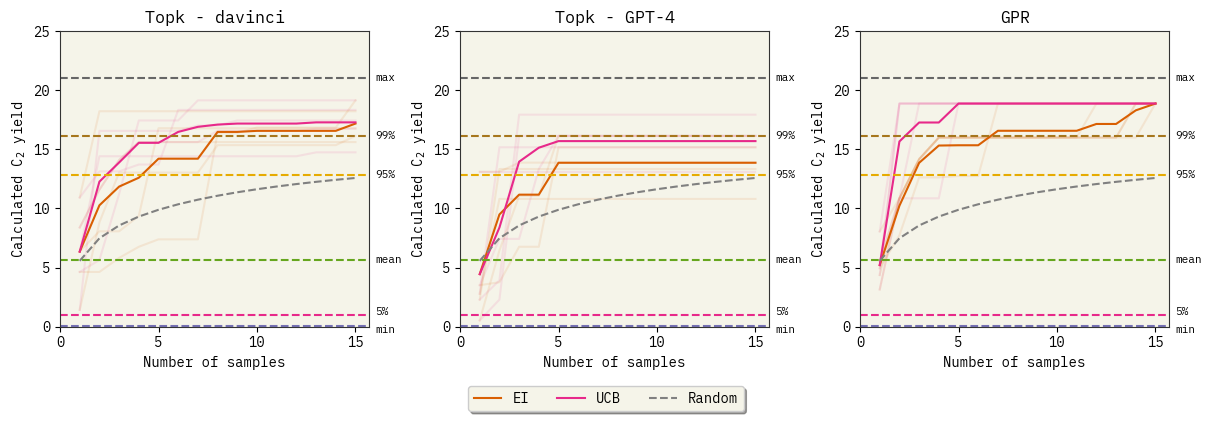

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), constrained_layout=True)
for ax in axs.flat:
    ax.set_aspect(0.6)

lim=(0,25)

plot_BO(axs[0], "../paper/out/C2_davinci_100.pkl","Topk - davinci", 
         raw_data[y_name], "C$_2$ yield", lim, label=False, data_file_random="../paper/out/C2 - random.pkl")
plot_BO(axs[1], "../paper/out/C2_GPT4_100.pkl","Topk - GPT-4",
         raw_data[y_name], "C$_2$ yield", lim, label=False, data_file_random="../paper/out/C2 - random.pkl")
plot_BO(axs[2], "../paper/out/C2_GPR_100.pkl", "GPR",
         raw_data[y_name], "C$_2$ yield", lim, label=True, data_file_random="../paper/out/C2 - random.pkl")

fig.legend(loc='upper center', bbox_to_anchor=(0.5,0),
          fancybox=True, shadow=True, ncol=6)
plt.savefig(f"figs/BO_C2", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
d_davinci = cloudpickle.load(open("paper/out/C2_davinci_100.pkl", "rb"))
d_gpt4 = cloudpickle.load(open("paper/out/C2_GPT4_100.pkl", "rb"))
d_gpr = cloudpickle.load(open("paper/out/C2_GPR_100.pkl", "rb"))
print(d_davinci['expected_improvement'][:, -1, 1].astype(float))
best_davinci = d_davinci['expected_improvement'][:, :, 1].astype(float).mean(axis=0)[-1]
print(f"DaVinci is top{np.sum(raw_data[y_name] > best_davinci)}: {best_davinci}")

print(d_gpt4['upper_confidence_bound'][:, -1, 1].astype(float))
best_gpt4 = d_gpt4['upper_confidence_bound'][:, :, 1].astype(float).mean(axis=0)[-1]
print(f"Gpt4 is top{np.sum(raw_data[y_name] > best_gpt4)}: {best_gpt4}")

print(d_gpr['expected_improvement'][:, -1, 1].astype(float))
best_gpr = d_gpr['upper_confidence_bound'][:, :, 1].astype(float).mean(axis=0)[-1]
print(f"GPR is top{np.sum(raw_data[y_name] > best_gpr)}: {best_gpr}")

sns.histplot(raw_data[y_name])
# print(np.sum(raw_data[y_name] > best))
plt.xlabel("measured C$_2$ yield")
plt.axvline(best_davinci, color='C1', linestyle='--', label="Davinci")
plt.axvline(best_gpt4, color='C2', linestyle='--', label="GPT4")
plt.axvline(best_gpr, color='C3', linestyle='--', label="GPR")
plt.legend()
plt.savefig(f"figs/hist_C2", dpi=300, bbox_inches='tight')
plt.show()

print(raw_data[raw_data[y_name] > best_davinci])



### iupac-sol

In [5]:
np.random.seed(0)
data_path = "../paper/data/esol_iupac.csv"
raw_data = pd.read_csv(data_path)
raw_data = raw_data.dropna()
raw_data = raw_data[["IUPAC", "measured log(solubility:mol/L)"]]
raw_data = raw_data.sample(frac=1).reset_index(drop=True)

# raw_data['measured log(solubility:mol/L)'] = -raw_data['measured log(solubility:mol/L)']
x_name = "IUPAC"
y_name = "measured log(solubility:mol/L)"

In [14]:
raw_data

,IUPAC,measured log(solubility:mol/L)
0,"2,6-dichlorophenol",-1.790
1,ethyl 2-[[(4-chloro-6-methoxypyrimidin-2-yl)-f...,-4.576
2,1-methoxy-4-prop-2-enylbenzene,-2.920
3,octan-1-ol,-2.390
4,hexane,-3.840
...,...,...
877,4-aminobenzenesulfonamide,-1.340
878,2-methylhexan-2-ol,-1.080
879,1-bromo-3-chlorobenzene,-3.210
880,fluorobenzene,-1.800


FileNotFoundError: [Errno 2] No such file or directory: 'figs/BO_sol.png'

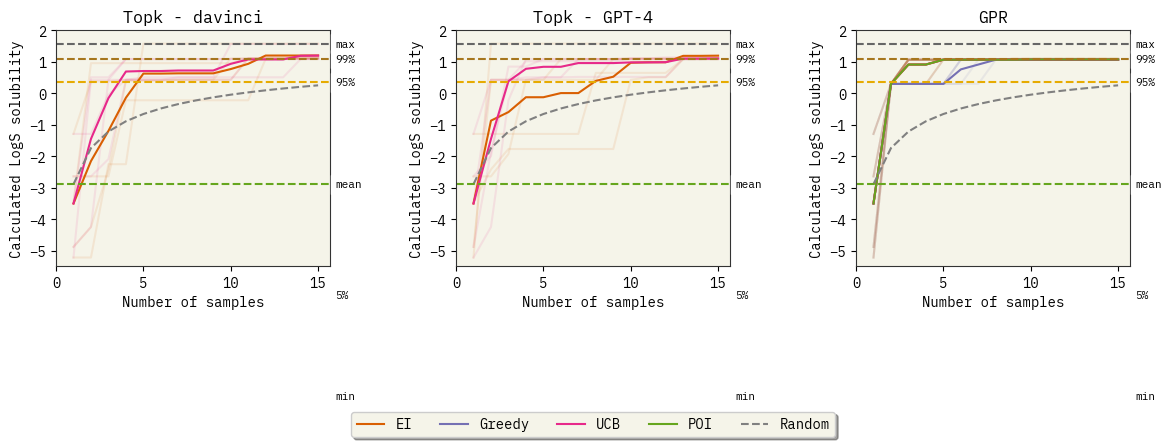

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), constrained_layout=True)
for ax in axs.flat:
    ax.set_aspect(1.8)

lim=(-5.5,2)

plot_BO(axs[0], "../paper/out/sol_davinci_100.pkl", "Topk - davinci",
         raw_data[y_name], "LogS solubility", lim, label=False, data_file_random="../paper/out/sol - random.pkl")
plot_BO(axs[1], "../paper/out/sol_gpt4_100.pkl", "Topk - GPT-4",
         raw_data[y_name], "LogS solubility", lim, label=False, data_file_random="../paper/out/sol - random.pkl")
plot_BO(axs[2], "../paper/out/sol_GPR_100.pkl", "GPR",
         raw_data[y_name], "LogS solubility", lim, label=True, data_file_random="../paper/out/sol - random.pkl")

fig.legend(loc='upper center', bbox_to_anchor=(0.5,0),
          fancybox=True, shadow=True, ncol=6)
plt.savefig(f"figs/BO_sol", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
raw_data['measured log(solubility:mol/L)'].max()

1.58

[1.11 1.58 1.11 1.11 1.11]
DaVinci is top3: 1.2040000000000002
[1.12 1.58 1.09 1.09 1.11]
Gpt4 is top3: 1.198
[1.07 1.1  1.07 1.07 1.1 ]
GPR is top10: 1.082


FileNotFoundError: [Errno 2] No such file or directory: 'figs/hist_sol.png'

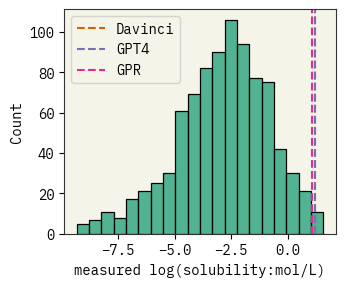

In [16]:
d_davinci = cloudpickle.load(open("../paper/out/sol_davinci_100.pkl", "rb"))
d_gpt4 = cloudpickle.load(open("../paper/out/sol_gpt4_100.pkl", "rb"))
d_gpr = cloudpickle.load(open("../paper/out/sol_GPR_100.pkl", "rb"))

print(d_davinci['expected_improvement'][:, -1, 1].astype(float))
best_davinci = d_davinci['expected_improvement'][:, :, 1].astype(float).mean(axis=0)[-1]
print(f"DaVinci is top{np.sum(raw_data[y_name] > best_davinci)}: {best_davinci}")

print(d_gpt4['expected_improvement'][:, -1, 1].astype(float))
best_gpt4 = d_gpt4['expected_improvement'][:, :, 1].astype(float).mean(axis=0)[-1]
print(f"Gpt4 is top{np.sum(raw_data[y_name] > best_gpt4)}: {best_gpt4}")

print(d_gpr['expected_improvement'][:, -1, 1].astype(float))
best_gpr = d_gpr['expected_improvement'][:, :, 1].astype(float).mean(axis=0)[-1]
print(f"GPR is top{np.sum(raw_data[y_name] > best_gpr)}: {best_gpr}")

sns.histplot(raw_data[y_name])
plt.axvline(best_davinci, color='C1', linestyle='--', label="Davinci")
plt.axvline(best_gpt4, color='C2', linestyle='--', label="GPT4")
plt.axvline(best_gpr, color='C3', linestyle='--', label="GPR")
plt.legend()
plt.savefig(f"figs/hist_sol", dpi=300, bbox_inches='tight')
plt.show()

print(raw_data[raw_data[y_name] > best_davinci-0.08])



# BayesOpt experiments

In [7]:
import uncertainty_toolbox as uct

def combine(s, l):
  '''Number of combinations of l elements with max = s'''
  return (s**l - (s-1)**(l))

def prob(s, l, n):
  '''Probability of getting a sample with max([x0,x1,...,xl]) = s where xi={0,n}'''
  return combine(s,l) * ((1/n)**l)

def expected_value_p(l, n):
  '''Expected value of max([x0,x1,...,xl]) where xi={0,n}'''
  E = [s * prob(s, l, n) for s in range(1,100+1)]
  return sum(E)

def expected_value_q(l, n, data):
  '''Expected value of max([x0,x1,...,xl]) where xi={0,n}'''
  quants = [data.quantile(i/100) for i in range(100+1)]
  # E = [(quants[s-1]) * prob(s, l, n) for s in range(1,100+1)]
  E = [((quants[s-1]+quants[s])/2) * prob(s, l, n) for s in range(1,100+1)]
  return sum(E)

from tenacity import (
    retry,
    stop_after_attempt,
    wait_random_exponential,
)

@retry(wait=wait_random_exponential(min=1, max=60), stop=stop_after_attempt(6))
def run_experiment(
    asktell, pool, raw_data, indexes, x_name, y_name, N=10, initial_train=1, ask_K=1, aq="random", start_index=0, calibrate=False
):
    if aq=='random_mean':
       return [ (i, expected_value_q(i, 100, raw_data[y_name])) for i in range(1,N+1) ]
    for i in indexes[:initial_train]:
        asktell.tell(raw_data[x_name].iloc[i], float(raw_data[y_name].iloc[i]))
    if calibrate:
        y = [float(raw_data[y_name].iloc[i]) for i in indexes[:initial_train]]
        pred = asktell.predict(y)
        ymeans = np.array([yhi.mean() for yhi in pred])
        ystds = np.array([yhi.std() for yhi in pred])
        calibration_factor = uct.recalibration.optimize_recalibration_ratio(ymeans, ystds, np.array(y),
                                                                        criterion="miscal")
        asktell.set_calibration_factor(calibration_factor)

    x = [raw_data[x_name].iloc[i] for i in indexes]

    pool.reset()
    xi = x[start_index]
    x.remove(xi)
    pool.choose(xi)
    # give one point
    yi = float(raw_data[raw_data[x_name] == xi][y_name].iloc[0])
    asktell.tell(xi, yi)
    point = [(xi, yi)]
    best = point[0][1]
    for i in range(1, N):
        if i == N - 1 and aq != "random":
            aq = "greedy"
        px, _, py = asktell.ask(pool, k=ask_K, aq_fxn=aq, _lambda=1.0)
        for j in range(ask_K):
          xc = px[j]
          x.remove(xc)
          pool.choose(xc)
          y = float(raw_data[raw_data[x_name] == xc][y_name].iloc[0])
          asktell.tell(xc, y)
          best = max(y, best)
        point.append((xc, best))
    return point

### C2

In [9]:
np.random.seed(88)

data_path = "paper/data/C2_yield_meth_oxy_short.csv"
# data_path = "./paper/data/ada_embedd_c2_dataset.csv"
raw_data = pd.read_csv(data_path)
# raw_data = raw_data.sample(frac=1).reset_index(drop=True)

# raw_data['completion'] = - raw_data['completion']

print(raw_data.columns)

N = raw_data.shape[0]
indexes = np.random.choice(raw_data.shape[0], int(N), replace=False)
x_name = "prompt"
y_name = "completion"
print(N, len(indexes))

# asktell = bolift.AskTellFewShotMulti(
#   x_formatter=lambda x: f"experimental procedure: {x}",
#   y_name="C2 yield",
#   y_formatter=lambda y: f"{y:.2f}",
#   model="text-curie-001",
#   selector_k=5,
#   temperature=0.05
# )

# asktell = bolift.AskTellFewShotTopk(
#   prefix="",
#   prompt_template=PromptTemplate(
#       input_variables=["x", "y", "y_name"],
#       template="Q: What is the {y_name} of {x}?@@@\nA: {y}###",
#   ),
#   suffix="What is the {y_name} of {x}?@@@\nA:",
#   x_formatter=lambda x: f"experimental procedure: {x}",
#   y_name="C2 yield",
#   y_formatter=lambda y: f"{y:.2f}",
#   # model="text-curie-001",
#   model="gpt-4",
#   selector_k=5,
#   temperature=0.7,
# )

pool_path = "paper/out/C2_pool.pkl"
if os.path.exists(pool_path):
  with open(pool_path, "rb") as f:
    pool = cloudpickle.load(f)
  pool.reset()
else:
  x = [raw_data[x_name].iloc[i] for i in indexes]
  pool = bolift.Pool(list(x), formatter=lambda x: f"experimental procedure: {x}")
  cloudpickle.dump(pool, open(pool_path, "wb"))
asktell = bolift.AskTellGPR(
  prefix="The following question should be answered with a number\n",
  prompt_template=PromptTemplate(
      input_variables=["x", "y", "y_name"],
      template="Q: What is the {y_name} of {x}?@@@\nA: {y}###",
  ),
  suffix="What is the {y_name} of {x}?@@@\nA:",
  x_formatter=lambda x: f"experimental procedure: {x}",
  y_name="C2 yield",
  y_formatter=lambda y: f"{y:.2f}",
  model='text-ada-001',
  pool=bolift.Pool([raw_data[x_name].iloc[i] for i in range(1000)], formatter=lambda x: f"experimental procedure: {x}"),
  n_components=32,
  # cache_path="GPR_ada_embed_cache.csv"
)

# asktell = bolift.AskTellRidgeKernelRegression(
#     prefix="The following question should be answered with a number\n",
#     prompt_template=PromptTemplate(
#         input_variables=["x", "y", "y_name"],
#         template="Q: What is the {y_name} of {x}?@@@\nA: {y}###",
#     ),
#     suffix="What is the {y_name} of {x}?@@@\nA:",
#     x_formatter=lambda x: f"iupac name {x}",
#     y_name="measured log solubility in mols per litre",
#     y_formatter=lambda y: f"{y:.2f}",
#     model="text-ada-001",
#     alpha=0.5
#   )

FileNotFoundError: [Errno 2] No such file or directory: 'paper/data/C2_yield_meth_oxy_short.csv'

In [ ]:
path_random = "paper/out/C2 - random.pkl"
path = "paper/out/C2_GPR_100.pkl"
pool_path = "paper/out/C2_pool.pkl"

if os.path.exists(pool_path):
  with open(pool_path, "rb") as f:
    pool = cloudpickle.load(f)
  pool.reset()
else:
  x = [raw_data[x_name].iloc[i] for i in indexes]
  pool = bolift.Pool(list(x), formatter=lambda x: f"experimental procedure: {x}")
  cloudpickle.dump(pool, open(pool_path, "wb"))
N = 15
M = 5
starts = np.random.randint(0, len(indexes), M)
# starts = [11394, 10185, 3573, 9200, 3752, 10332, 10905, 3679, 11461, 491]
# print(starts)
# print([raw_data[y_name].iloc[i] for i in starts])

In [ ]:
if os.path.exists(path):
    bayesOpts_random = cloudpickle.load(open(path_random, "rb"))
    bayesOpts = cloudpickle.load(open(path, "rb"))
else:
    bayesOpts = {}

for aq in ["random", "expected_improvement", "greedy", 'upper_confidence_bound', 'probability_of_improvement']:
    print(aq, "start:", end=" ")
    points = []
    for i in range(M):
        print(i, end=",  ")
        point = run_experiment(
            copy.deepcopy(asktell),
            copy.deepcopy(pool),
            raw_data,
            indexes,
            x_name,
            y_name,
            N=N,
            aq=aq,
            start_index=starts[i],
            calibrate=True,
            initial_train=100
        )
        points.append(point)
    # plot mean
    points = np.array(points)
    bayesOpts[aq] = points
    print(aq, "done")
    # asktell.save_cache("GPR_ada_embed_cache.csv")
    cloudpickle.dump(bayesOpts, open(path, "wb"))

cloudpickle.dump(bayesOpts, open(path, "wb"))

In [ ]:
d = cloudpickle.load(open(path, "rb"))
d_r = cloudpickle.load(open(path_random, "rb"))
N=15
M=5

plt.figure(figsize=(3.5, 3.5 / 1.2))
for i in range(M):
    plt.plot(range(1, N + 1), [float(y) for x, y in d['expected_improvement'][i,:N]], color="C1", alpha=0.1)
    plt.plot(range(1, N + 1), [float(y) for x, y in d['greedy'][i,:N]], color="C2", alpha=0.1)
    plt.plot(range(1, N + 1), [float(y) for x, y in d['upper_confidence_bound'][i,:N]], color="C3", alpha=0.1)
    plt.plot(range(1, N + 1), [float(y) for x, y in d['probability_of_improvement'][i,:N]], color="C4", alpha=0.1)
    plt.plot(range(1, N + 1), [float(y) for x, y in d['random'][i,:N]], color="C0", alpha=0.1)
plt.plot(
    range(1, N + 1), d['expected_improvement'][:, :N, 1].astype(float).mean(axis=0), color="C1", label="EI"
)
plt.plot(
    range(1, N + 1), d['greedy'][:, :N, 1].astype(float).mean(axis=0), color="C2", label="Greedy",
)
plt.plot(
    range(1, N + 1), d['upper_confidence_bound'][:, :N, 1].astype(float).mean(axis=0), color="C3", label="UCB",
)
plt.plot(
    range(1, N + 1), d['probability_of_improvement'][:, :N, 1].astype(float).mean(axis=0), color="C4", label="POI",
)
plt.plot(
    range(1, N + 1), d['random'][:, :N, 1].astype(float).mean(axis=0), color="C0", label="Random",
)
plt.axhline(y=raw_data[y_name].max(), color="C2", linestyle="--")
plt.text(N + 1, raw_data[y_name].max(), "max", va="center", ha="left", backgroundcolor="w", fontsize=8)
plt.axhline(y=raw_data[y_name].quantile(0.95), color="C4", linestyle="--")
plt.text(N + 1, raw_data[y_name].quantile(0.95), "95%", va="center", ha="left", backgroundcolor="w", fontsize=8)
plt.axhline(y=raw_data[y_name].mean(), color="C1", linestyle="--")
plt.text(N + 1, raw_data[y_name].mean(), "mean", va="center", ha="left", backgroundcolor="w", fontsize=8)
plt.axhline(y=raw_data[y_name].quantile(0.05), color="C3", linestyle="--")
plt.text(N + 1, raw_data[y_name].quantile(0.05)+0.3, "5%", va="center", ha="left", backgroundcolor="w", fontsize=8)
plt.axhline(y=raw_data[y_name].min(), color="C0", linestyle="--")
plt.text(N + 1, raw_data[y_name].min()-0.3, "min", va="center", ha="left", backgroundcolor="w", fontsize=8)

plt.xlabel("Samples")
plt.ylabel("Calculated C2 yield")
# reduce number of ticks
plt.xticks([i for i in range(0,N+1,5)], [str(x * 1) for x in [i for i in range(0,N+1,5)]])
# plt.ylim(-6, 3)
# plt.yticks(np.linspace(-10, 0, 3))
plt.title("C$_2$ - Topk - davinci")
plt.legend(loc="center left", bbox_to_anchor=(1.15, 0.5))

In [ ]:
import seaborn as sns

d['expected_improvement'][1][-1][1]
best = d['expected_improvement'][:, :, 1].astype(float).mean(axis=0)[-1]
print(best)

sns.histplot(raw_data[y_name])
print(np.sum(raw_data[y_name] > best))

### IUPAC-Solubility

In [14]:
np.random.seed(0)

data_path = "../paper/data/esol_iupac.csv"
raw_data = pd.read_csv(data_path)
raw_data = raw_data.dropna()
raw_data = raw_data[["IUPAC", "measured log(solubility:mol/L)"]]
raw_data = raw_data.sample(frac=1).reset_index(drop=True)

# raw_data['measured log(solubility:mol/L)'] = -raw_data['measured log(solubility:mol/L)']

print(raw_data.columns)

N = raw_data.shape[0]
indexes = [i for i in range(N)]  # np.random.choice(raw_data.shape[0], int(N), replace=False)
x_name = "IUPAC"
y_name = "measured log(solubility:mol/L)"
print(len(raw_data), len(indexes))

asktell = bolift.AskTellFewShotTopk(
  prefix="",
  prompt_template=PromptTemplate(
      input_variables=["x", "y", "y_name"],
      template="Q: What is the {y_name} of {x}?@@@\nA: {y}###",
  ),
  suffix="What is the {y_name} of {x}?@@@\nA:",
  x_formatter=lambda x: f"iupac name {x}",
  y_name="measured log solubility in mols per litre",
  y_formatter=lambda y: f"{y:.2f}",
  model="text-davinci-003",
  selector_k=5,
  temperature=0.7,
)

# asktell = bolift.AskTellFewShotMulti(
#     x_formatter=lambda x: f"iupac name {x}",
#     y_name="measured log solubility in mols per litre",
#     y_formatter=lambda y: f"{y:.2f}",
#     model="text-curie-001",
#     selector_k=5,
#     temperature=0.05
# )

# asktell = bolift.AskTellGPR(
#   prefix="The following question should be answered with a number\n",
#   prompt_template=PromptTemplate(
#       input_variables=["x", "y", "y_name"],
#       template="Q: What is the {y_name} of {x}?@@@\nA: {y}###",
#   ),
#   suffix="What is the {y_name} of {x}?@@@\nA:",
#   x_formatter=lambda x: f"iupac name {x}",
#   y_name="measured log solubility in mols per litre",
#   y_formatter=lambda y: f"{y:.2f}",
#   model='text-ada-001',
#   pool=bolift.Pool(raw_data[x_name].to_list(), formatter=lambda x: f"iupac name {x}"),
#   n_components=16,
# )

Index(['IUPAC', 'measured log(solubility:mol/L)'], dtype='object')
882 882


In [12]:
len(indexes)

882

In [13]:
x = [raw_data[x_name].iloc[i] for i in indexes]
path_random = "../paper/out/sol - random.pkl"
path = "../paper/out/sol_davinci_100.pkl"
pool_path = "../paper/out/sol_pool.pkl"

if os.path.exists(pool_path):
  with open(pool_path, "rb") as f:
    pool = cloudpickle.load(f)
  pool.reset()
else:
  x = [raw_data[x_name].iloc[i] for i in indexes]
  pool = bolift.Pool(list(x), formatter=lambda x: f"experimental procedure: {x}")
  cloudpickle.dump(pool, open(pool_path, "wb"))

N = 15
M = 5
starts = np.random.randint(0, len(indexes), M)
# starts = [110, 374, 790, 365, 523, 119, 560, 199, 239, 694, 608, 850, 599, 405, 510, 514, 264, 266, 261, 294, 612]
# print([raw_data[y_name].iloc[i] for i in starts])

In [ ]:
if os.path.exists(path):
    bayesOpts_random = cloudpickle.load(open(path_random, "rb"))
    bayesOpts = cloudpickle.load(open(path, "rb"))
else:
    bayesOpts = {}

for aq in ["random", "expected_improvement", "greedy", 'upper_confidence_bound', 'probability_of_improvement']:
    print(aq, "start:", end=" ")
    points = []
    for i in range(M):
        print(i, end=",  ")
        point = run_experiment(
            copy.deepcopy(asktell),
            copy.deepcopy(pool),
            raw_data,
            indexes,
            x_name,
            y_name,
            N=N,
            aq=aq,
            start_index=starts[i],
            calibrate=True,
            initial_train=100
        )
        points.append(point)
    # plot mean
    points = np.array(points)
    bayesOpts[aq] = points
    print(aq, "done")
    # asktell.save_cache("GPR_ada_embed_cache.csv")
    cloudpickle.dump(bayesOpts, open(path, "wb"))

cloudpickle.dump(bayesOpts, open(path, "wb"))

In [ ]:
d = cloudpickle.load(open(path, "rb"))
d_r = cloudpickle.load(open(path_random, "rb"))
N=15
M=5

plt.figure(figsize=(3.5, 3.5 / 1.2))
for i in range(M):
    plt.plot(range(1, N + 1), [float(y) for x, y in d['expected_improvement'][i,:N]], color="C1", alpha=0.1)
    plt.plot(range(1, N + 1), [float(y) for x, y in d['greedy'][i,:N]], color="C2", alpha=0.1)
    plt.plot(range(1, N + 1), [float(y) for x, y in d['upper_confidence_bound'][i,:N]], color="C3", alpha=0.1)
    plt.plot(range(1, N + 1), [float(y) for x, y in d['probability_of_improvement'][i,:N]], color="C4", alpha=0.1)
    plt.plot(range(1, N + 1), [float(y) for x, y in d['random'][i,:N]], color="C0", alpha=0.1)
plt.plot(
    range(1, N + 1), d['expected_improvement'][:, :N, 1].astype(float).mean(axis=0), color="C1", label="EI"
)
plt.plot(
    range(1, N + 1), d['greedy'][:, :N, 1].astype(float).mean(axis=0), color="C2", label="Greedy",
)
plt.plot(
    range(1, N + 1), d['upper_confidence_bound'][:, :N, 1].astype(float).mean(axis=0), color="C3", label="UCB",
)
plt.plot(
    range(1, N + 1), d['probability_of_improvement'][:, :N, 1].astype(float).mean(axis=0), color="C4", label="POI",
)
plt.plot(
    range(1, N + 1), d_r['random_mean'][:, :N, 1].astype(float).mean(axis=0), color="C0", label="Random",
)
plt.axhline(y=raw_data[y_name].max(), color="C2", linestyle="--")
plt.text(N + 1, raw_data[y_name].max(), "max", va="center", ha="left", backgroundcolor="w", fontsize=8)
plt.axhline(y=raw_data[y_name].quantile(0.95), color="C4", linestyle="--")
plt.text(N + 1, raw_data[y_name].quantile(0.95), "95%", va="center", ha="left", backgroundcolor="w", fontsize=8)
plt.axhline(y=raw_data[y_name].mean(), color="C1", linestyle="--")
plt.text(N + 1, raw_data[y_name].mean(), "mean", va="center", ha="left", backgroundcolor="w", fontsize=8)
# plt.axhline(y=raw_data[y_name].quantile(0.05), color="C3", linestyle="--")
# plt.text(N + 1, raw_data[y_name].quantile(0.05)+0.3, "5%", va="center", ha="left", backgroundcolor="w", fontsize=8)
# plt.axhline(y=raw_data[y_name].min(), color="C0", linestyle="--")
# plt.text(N + 1, raw_data[y_name].min()-0.3, "min", va="center", ha="left", backgroundcolor="w", fontsize=8)

plt.xlabel("Samples")
plt.ylabel("Calculated C2 yield")
# reduce number of ticks
plt.xticks([i for i in range(0,N+1,5)], [str(x * 1) for x in [i for i in range(0,N+1,5)]])
plt.ylim(-5.5, 3)
# plt.yticks(np.linspace(-10, 0, 3))
plt.title("C$_2$ - Topk - davinci")
plt.legend(loc="center left", bbox_to_anchor=(1.15, 0.5))

In [ ]:
import seaborn as sns

d['expected_improvement'][1][-1][1]
best = d['expected_improvement'][:, :, 1].astype(float).mean(axis=0)[-1]
print(best)

sns.histplot(raw_data[y_name])
print(np.sum(raw_data[y_name] > best))
plt.axvline(best, color='red', linestyle='--')
plt.show()


### Alloy

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(0)

data_path = "paper/data/yield_strength.csv"
raw_data = pd.read_csv(data_path)
# raw_data = raw_data.sample(frac=1).reset_index(drop=True)

print(raw_data.columns)

N = raw_data.shape[0]
indexes = np.random.choice(raw_data.shape[0], int(N), replace=False)
# shuffle test

print(N, len(indexes))

asktell = bolift.AskTellFewShotTopk(
    prefix="",
    prompt_template=PromptTemplate(
        input_variables=["x", "y", "y_name"],
        template="Q: What is the {y_name} of {x}?@@@\nA: {y}###",
    ),
    suffix="What is the {y_name} of {x}?@@@\nA:",
    # x_formatter=lambda x: f"alloy composition: {x}",
    y_name="yield strength",
    y_formatter=lambda y: f"{y:.2f}",
    model="gpt-4",
    selector_k=5,
)


x_name = "composition"
y_name = "yield strength"


In [ ]:
N = 10
M = 5
starts = np.random.randint(0, len(indexes), M)
plt.figure(figsize=(3.5, 3.5 / 1.2))
random_points = []
for i in range(M):
    point = run_experiment(
        asktell,
        raw_data,
        indexes,
        x_name,
        y_name,
        N=N,
        aq="random",
        start_index=starts[i],
    )
    random_points.append(point)
    plt.plot(range(N + 1), [y for x, y in point], color="C0", alpha=0.1)
# plot mean
random_points = np.array(random_points)
plt.plot(
    range(N + 1),
    random_points[:, :, 1].astype(float).mean(axis=0),
    color="C0",
    label="Random",
)

greedy_points = []
for i in range(M):
    point = run_experiment(
        asktell,
        raw_data,
        indexes,
        x_name,
        y_name,
        N=N,
        aq="greedy",
        start_index=starts[i],
    )
    greedy_points.append(point)
    plt.plot(range(N + 1), [y for x, y in point], color="C2", alpha=0.1)
# plot mean
greedy_points = np.array(greedy_points)
plt.plot(
    range(N + 1),
    greedy_points[:, :, 1].astype(float).mean(axis=0),
    color="C2",
    label="Greedy",
)

ei_points = []
for i in range(M):
    point = run_experiment(
        asktell,
        raw_data,
        indexes,
        x_name,
        y_name,
        N=N,
        aq="expected_improvement",
        start_index=starts[i],
    )
    ei_points.append(point)
    plt.plot(range(N + 1), [y for x, y in point], color="C1", alpha=0.1)
# plot mean
ei_points = np.array(ei_points)
plt.plot(
    range(N + 1), ei_points[:, :, 1].astype(float).mean(axis=0), color="C1", label="EI"
)

plt.axhline(y=raw_data["yield strength"].min(), color="C0", linestyle="--", label="min")
plt.axhline(
    y=raw_data["yield strength"].mean(), color="C1", linestyle="--", label="mean"
)
plt.axhline(y=raw_data["yield strength"].max(), color="C2", linestyle="--", label="max")
# give 5% quantiles
plt.axhline(
    y=raw_data["yield strength"].quantile(0.05), color="C3", linestyle="--", label="5%"
)
plt.axhline(
    y=raw_data["yield strength"].quantile(0.95), color="C4", linestyle="--", label="95%"
)

plt.xlabel("Samples")
# reduce number of ticks
# plt.xticks([0, 5, 10])
# plt.ylim(-10, 0)
# plt.yticks(np.linspace(-10, 0, 3))
plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
plt.savefig("concept_multi.png", dpi=300)